In [ ]:
!pip install zipfile36
from zipfile import ZipFile


def unzip(file_path):
    """Unzips the file located at file_path to the current directory."""
    with ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(".")


zip_file_path = "/content/drive/MyDrive/ai concept/week4/Copy of devnagari digit.zip"

In [ ]:
unzip(zip_file_path)


In [ ]:
pip install keras tensorflow

In [ ]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


In [ ]:
import tensorflow as tf
x = tf.Variable(5.0) # Trainable variable
with tf.GradientTape() as tape:
  y = x ** 2 # y = x^2
grad = tape.gradient(y, x) # Computes dy/dx automatically
print(grad.numpy()) # Output: 10.0

10.0


In [ ]:
import numpy as np
import tensorflow as tf
import time
# Create large random matrices
size = (1000, 1000)
A = np.random.rand(*size)
B = np.random.rand(*size)
# NumPy Multiplication
start = time.time()
C_numpy = np.dot(A, B)
print("NumPy Time:", time.time() - start)
# TensorFlow Multiplication (for colab uses GPU Runtime if available)
A_tf = tf.constant(A)
B_tf = tf.constant(B)
start = time.time()
C_tf = tf.matmul(A_tf, B_tf)
print("TensorFlow Time:", time.time() - start)

NumPy Time: 0.15815043449401855
TensorFlow Time: 0.1262047290802002


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the images to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
# Flatten the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
# One-hot encode the labels (0-9) for classification
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28*28,)
model = keras.Sequential(
[
keras.layers.Input(shape=input_shape),
keras.layers.Flatten(), # Flatten the 28x28 image to a 784-dimensional vector
keras.layers.Dense(64, activation="sigmoid"),
keras.layers.Dense(128, activation="sigmoid"),
keras.layers.Dense(256, activation="sigmoid"),
keras.layers.Dense(num_classes, activation="softmax"),
]
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
optimizer="sgd", # Stochastic Gradient Descent
loss="categorical_crossentropy", # Loss function for multi-class classification
metrics=["accuracy"] # Track accuracy during training
)

In [ ]:
batch_size = 128
epochs = 2000
# Callbacks
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
  x_train,
  y_train,
  batch_size=batch_size,
  epochs=epochs,
  validation_split=0.15,
  callbacks=callbacks,
)

Epoch 1/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1108 - loss: 2.3077 - val_accuracy: 0.1063 - val_loss: 2.3013
Epoch 2/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1115 - loss: 2.3005 - val_accuracy: 0.1063 - val_loss: 2.2987
Epoch 3/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1155 - loss: 2.2988 - val_accuracy: 0.1066 - val_loss: 2.2973
Epoch 4/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1247 - loss: 2.2970 - val_accuracy: 0.1093 - val_loss: 2.2951
Epoch 5/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1247 - loss: 2.2945 - val_accuracy: 0.1063 - val_loss: 2.2939
Epoch 6/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1290 - loss: 2.2934 - val_accuracy: 0.1063 - val_loss: 2.2928
Epoch 7/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1347 - loss: 2.2908 - val_accuracy: 0.1088 - val_loss: 2.2890
Epoch 8/2000
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1403 - loss: 2.2881 -

In [ ]:
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4),
]

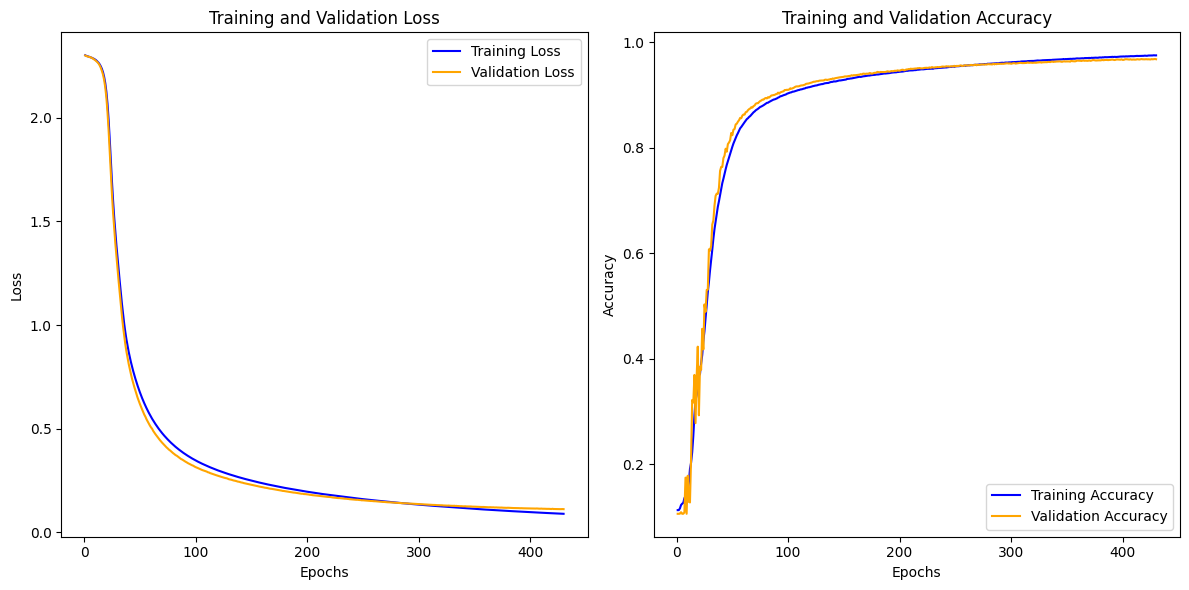

In [ ]:
import matplotlib.pyplot as plt
# Assuming ’history’ is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 5ms/step - accuracy: 0.9650 - loss: 0.1172
Test accuracy: 0.9650


In [ ]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for first image: 7
True label for first image: 7


In [ ]:
model.save('mnist_fully_connected_model.h5')

**Actual Workshop Starting**

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


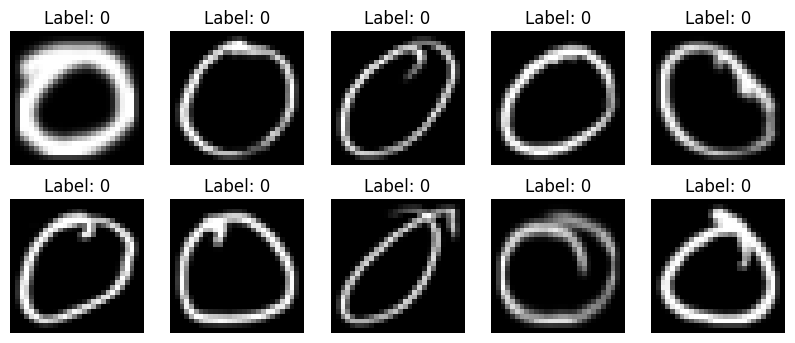

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow
# Define dataset paths
train_dir = "/content/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/DevanagariHandwrittenDigitDataset/Test"
# Define image size
img_height, img_width = 28, 28
# Function to load images and labels using PIL
def load_images_from_folder(folder):
  images = []
  labels = []
  class_names = sorted(os.listdir(folder)) # Sorted class names (digit_0, digit_1, ...)
  class_map = {name: i for i, name in enumerate(class_names)} # Map class names to labels
  for class_name in class_names:
    class_path = os.path.join(folder, class_name)
    label = class_map[class_name]
    for filename in os.listdir(class_path):
      img_path = os.path.join(class_path, filename)
      # Load image using PIL
      img = Image.open(img_path).convert("L") # Convert to grayscale
      img = img.resize((img_width, img_height)) # Resize to (28,28)
      img = np.array(img) / 255.0 # Normalize pixel values to [0,1]
      images.append(img)
      labels.append(label)
  return np.array(images), np.array(labels)
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)
# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1) # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")
# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
  plt.title(f"Label: {np.argmax(y_train[i])}")
  plt.axis("off")
plt.show()

In [ ]:
x_train = x_train.reshape(-1, img_height, img_width, 1)

In [ ]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
  [
    keras.layers.Input(shape=input_shape),
    keras.layers.Flatten(), # Flatten the 28x28 image to a 784-dimensional vector
    keras.layers.Dense(64, activation="sigmoid"),
    keras.layers.Dense(128, activation="sigmoid"),
    keras.layers.Dense(256, activation="sigmoid"),
    keras.layers.Dense(num_classes, activation="softmax"),
  ]
)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
def build_functional_model():
  # Input layer
  inputs = keras.Input(shape=input_shape)
  # Flatten layer
  x = keras.layers.Flatten()(inputs)
  # Hidden layers
  x = keras.layers.Dense(64, activation="relu")(x)
  x = keras.layers.Dense(128, activation="relu")(x)
  x = keras.layers.Dense(256, activation="relu")(x)
  # Output layer
  outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
  # Create model
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model
# Build the model
functional_model = build_functional_model()
functional_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
optimizer="sgd", # Stochastic Gradient Descent
loss="categorical_crossentropy", # Loss function for multi-class classification
metrics=["accuracy"] # Track accuracy during training
)

In [ ]:
batch_size = 128
epochs = 20
# Callbacks
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
]
# Train the model with callbacks and validation split
history = model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.15,
callbacks=callbacks,
)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9862 - loss: 0.0622 - val_accuracy: 0.3239 - val_loss: 8.6395
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9842 - loss: 0.0661 - val_accuracy: 0.3239 - val_loss: 8.6311
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9856 - loss: 0.0618 - val_accuracy: 0.3239 - val_loss: 8.6373
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9837 - loss: 0.0664 - val_accuracy: 0.3239 - val_loss: 8.6380
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9852 - loss: 0.0632 - val_accuracy: 0.3239 - val_loss: 8.6440
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9828 - loss: 0.0678 - val_accuracy: 0.3239 - val_loss: 8.6407
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9860 - loss: 0.0621 - val_accuracy: 0.3239 - val_loss: 8.6436
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9844 - loss: 0.0651 - val_accuracy: 0.

In [ ]:
callbacks = [
  keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
  keras.callbacks.EarlyStopping(monitor="val_loss", patience=4),
]

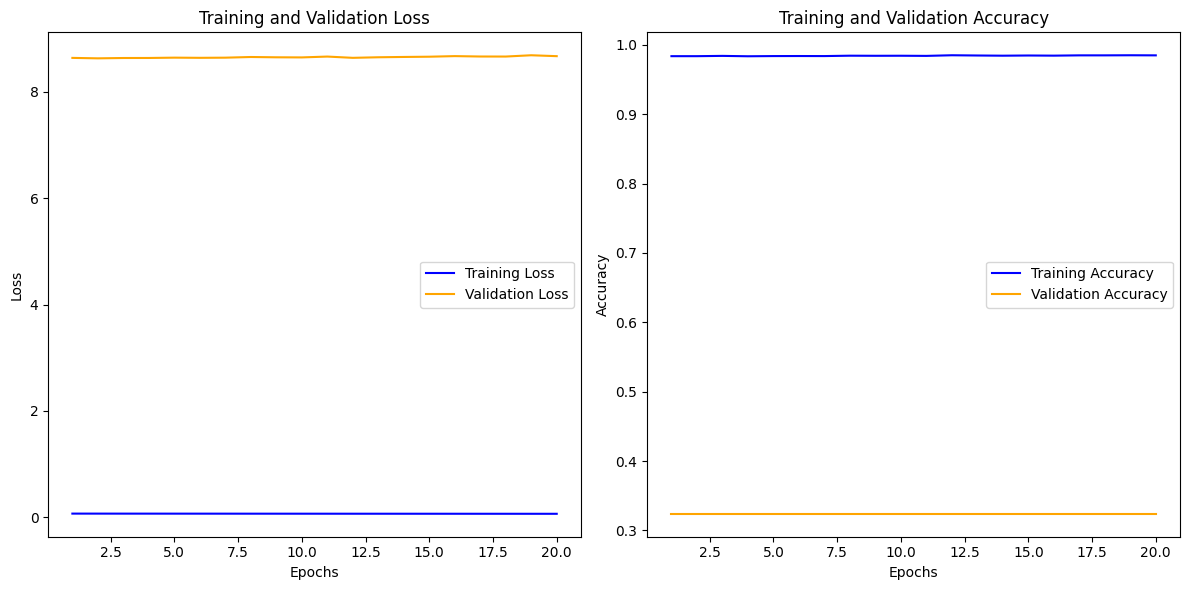

In [ ]:
import matplotlib.pyplot as plt
# Assuming ’history’ is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.8723 - loss: 1.3888
Test accuracy: 0.8723


In [ ]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted label for first image: 0
True label for first image: 0
